Dimensionality reduction is simply extracting the most significant/impactful features (dimensions or columns) within a huge dataset.

### Principal Component Analysis

Principal Component Analysis (PCA) is a method of dimensionality reduction. It is based on finding `principal components` of the data - those patterns which highly influence the data. This can be used to find the most optimal features for decision tree based machine learning algorithm, as it mathematically calculates the significance of features.

Since PCA can only be implemented on numeric values, it may lead to loss of information due to encoding.

| Feature | Policy #1 | Policy #2 |
| --- | --- | --- |
| ACCOUNT_AGE | 328 | 228 |
| CUSTOMER_AGE | 48 | 42 |
| DEDUCTABLE | 1000 | 2000 |
| ANNUAL_FEE | 1406.91 | 1197.22 |
| UMBRELLA_LIMIT | 0 | 5000000 |
| CAPITAL_GAINS | 53300 | 0 |
| NUMBER_OF_VEHICLES | 1 | 1 |
| TOTAL_CLAIM_AMOUNT | 71610 | 5070 |

#### Plotting feature values for `Policy #1`

<img src='https://raw.githubusercontent.com/puneettrainer/pics/main/policy-1.png' style='margin: auto;'>
<p style='margin: auto; text-align: center;'>Plotting the Features for Policy #1</p>

#### Plotting features values for `Policy #1` with `Policy #2`

<img src='https://raw.githubusercontent.com/puneettrainer/pics/main/policy-1v2.png' style='margin: auto;'>
<p style='margin: auto; text-align: center;'>Plotting the Features for Policy #1 against Policy #2</p>

#### Fitting `PC1`

<img src='https://raw.githubusercontent.com/puneettrainer/pics/main/line-fit.png' style='margin: auto;'>
<p style='margin: auto; text-align: center;'>Fitting a line through origin, that is as close to all points as possible</p>

#### Fitting `PC2`

<img src='https://raw.githubusercontent.com/puneettrainer/pics/main/pc2.png' style='margin: auto;'>
<p style='margin: auto; text-align: center;'>Fitting a line through origin, that is as perpendicular to the first line</p>

#### Rearranging the axis according to computed principal components

<img src='https://raw.githubusercontent.com/puneettrainer/pics/main/pcaplot.png' style='margin: auto;'>
<p style='margin: auto; text-align: center;'>Rearranging the above plot so that the principal components serve as new axes</p>

#### Extracting `loadings`

| Feature | PC #1 Loading | PC #2 Loading |
| --- | --- | --- |
| ACCOUNT_AGE | 5 | 0.1 |
| CUSTOMER_AGE | 5.2 | -3 |
| DEDUCTABLE | 5.9 | 0 |
| ANNUAL_FEE | 10 | 4 |
| UMBRELLA_LIMIT | 10.1 | -7 |
| CAPITAL_GAINS | 15 | -0.9 |
| NUMBER_OF_VEHICLES | 17 | 5 | 
| TOTAL_CLAIM_AMOUNT | 18 | -8 |

Value of each point from the axes gives its weightage (this is called `loading` in terms of PCA). An array of these loadings is called the `eigenvector` of the principal component.

After computing the eigenvector, we can calculate the `eigenvalue` of each component. This represents the variation explained by the particular component.

$\text{Eigenvalue} = \frac{\sum loading_i ^ 2}{n - 1}$

When we add up the eigenvalues for all principal components and use this sum to divide each individual eigenvalue, we get the variation ratio.

$\text{Variation Ratio} = \frac{\text{eigenvalue}_i}{\sum\text{eigenvalue}_i}$

Using the loadings computed, we calculate the dimension score by multiplying each loading with its respective value in the sample, and summing it.

| Feature | PC #1 Loading | PC #2 Loading | Policy #1 | Policy #2 | $\text{PC}_1 \times \text{Policy}_1$ | $\text{PC}_2 \times \text{Policy}_1$ | $\text{PC}_1 \times \text{Policy}_2$ | $\text{PC}_2 \times \text{Policy}_2$ |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| ACCOUNT_AGE | 5 | 0.1 | 328 | 228 | 1640.0 | 32.80 | 1140.0 | 22.80 |
| CUSTOMER_AGE | 5.2 | -3 | 48 | 42 | 249.6 | -144.00 | 218.4 | -126.00 |
| DEDUCTABLE | 5.9 | 0 | 1000 | 2000 | 5900.0 |	0.00 |	11800.0 |	0.00 |
| ANNUAL_FEE | 10 | 4 | 1406.91 | 1197.22 | 14069.1 |	5627.64 |	11972.2 |	4788.88 |
| UMBRELLA_LIMIT | 10.1 | -7 | 0 | 5000000 | 0.0 |	-0.00 |	50500000.0	| -35000000.00 |
| CAPITAL_GAINS | 15 | -0.9 | 53300 | 0 | 799500.0 |	-47970.00 |	0.0 |	-0.00 |
| NUMBER_OF_VEHICLES | 17 | 5 | 1 | 1 | 17.0 |	5.00 |	17.0 |	5.00 |
| TOTAL_CLAIM_AMOUNT | 18 | -8 | 71610 | 5070.00 | 1288980 | -572880.00 |	91260.0 |	-40560.00 |

| Policy # | $\text{PC}_1 \: \text{Score}$ | $\text{PC}_2 \: \text{Score}$ |
| --- | --- | --- |
| 1 | 2110355.7 | -615328.56 |
| 2 | 50616407.6 | -35035869.32 |

In [43]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

insurance_data = pd.read_csv(r'https://raw.githubusercontent.com/puneettrainer/datasets/main/insurance_fraud.csv')
insurance_data.head()

,ACCOUNT_AGE,CUSTOMER_AGE,POLICY_NUMBER,POLICY_START_DATE,POLICY_STATE,LIABILITY_AMOUNT,DEDUCTABLE,ANNUAL_FEE,UMBRELLA_LIMIT,ZIP_CODE,GENDER,EDUCATION_LEVEL,OCCUPATION,CAPITAL_GAINS,INCIDENT_DATE,INCIDENT_TYPE,COLLISION_TYPE,INCIDENT_SEVERITY,AUTHORITIES,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR,NUMBER_OF_VEHICLES,PROPERTY_DAMAGE,BODILY_INJURIES,WITNESSES,POLICE_REPORT,TOTAL_CLAIM_AMOUNT,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM,AUTO_MAKE,AUTO_MODEL,AUTO_YEAR,FRAUD
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,53300,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,35100,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,-13500,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,20000,2015-02-17,Vehicle Theft,NaN,Minor Damage,NaN,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [44]:
# checking for any formatting if required
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACCOUNT_AGE         1000 non-null   int64  
 1   CUSTOMER_AGE        1000 non-null   int64  
 2   POLICY_NUMBER       1000 non-null   int64  
 3   POLICY_START_DATE   1000 non-null   object 
 4   POLICY_STATE        1000 non-null   object 
 5   LIABILITY_AMOUNT    1000 non-null   object 
 6   DEDUCTABLE          1000 non-null   int64  
 7   ANNUAL_FEE          1000 non-null   float64
 8   UMBRELLA_LIMIT      1000 non-null   int64  
 9   ZIP_CODE            1000 non-null   int64  
 10  GENDER              1000 non-null   object 
 11  EDUCATION_LEVEL     1000 non-null   object 
 12  OCCUPATION          1000 non-null   object 
 13  CAPITAL_GAINS       1000 non-null   int64  
 14  INCIDENT_DATE       1000 non-null   object 
 15  INCIDENT_TYPE       1000 non-null   object 
 16  COLLISI

Based on the above meta-data, we need to
- convert `POLICY_START_DATE` to datetime
- convert `INCIDENT_DATE` to datetime
- deal with missing data in `COLLISION_TYPE`
- deal with missing data in `AUTHORITIES`

In [45]:
# converting date columns to date data type
insurance_data['POLICY_START_DATE'] = pd.to_datetime(insurance_data['POLICY_START_DATE'])
insurance_data['INCIDENT_DATE'] = pd.to_datetime(insurance_data['INCIDENT_DATE'])

Before dealing with missing values, we need to figure the cause of missing values (whether they are unreported or must be null)

In [46]:
# investigating 'COLLISION_TYPE'
insurance_data.loc[(insurance_data['COLLISION_TYPE'].isna())]

,ACCOUNT_AGE,CUSTOMER_AGE,POLICY_NUMBER,POLICY_START_DATE,POLICY_STATE,LIABILITY_AMOUNT,DEDUCTABLE,ANNUAL_FEE,UMBRELLA_LIMIT,ZIP_CODE,GENDER,EDUCATION_LEVEL,OCCUPATION,CAPITAL_GAINS,INCIDENT_DATE,INCIDENT_TYPE,COLLISION_TYPE,INCIDENT_SEVERITY,AUTHORITIES,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR,NUMBER_OF_VEHICLES,PROPERTY_DAMAGE,BODILY_INJURIES,WITNESSES,POLICE_REPORT,TOTAL_CLAIM_AMOUNT,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM,AUTO_MAKE,AUTO_MODEL,AUTO_YEAR,FRAUD
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,20000,2015-02-17,Vehicle Theft,NaN,Minor Damage,NaN,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,626808,2012-10-26,OH,100/300,1000,936.61,0,464652,FEMALE,MD,armed-forces,20000,2015-01-08,Parked Car,NaN,Minor Damage,NaN,SC,Springfield,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
26,257,43,863236,1990-09-20,IN,100/300,2000,1322.10,0,436984,MALE,High School,prof-specialty,-29200,2015-01-28,Parked Car,NaN,Minor Damage,Police,PA,Arlington,4,1,YES,1,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N
27,202,34,608513,2002-07-18,IN,100/300,500,848.07,3000000,607730,MALE,JD,exec-managerial,800,2015-01-07,Vehicle Theft,NaN,Minor Damage,NaN,VA,Northbrook,5,1,YES,2,1,NO,5720,1040,520,4160,Suburu,Forrestor,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,390256,2009-11-25,IN,500/1000,1000,1200.33,4000000,477631,FEMALE,High School,craft-repair,-36400,2015-02-06,Vehicle Theft,NaN,Minor Damage,Police,WV,Springfield,7,1,NO,2,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y
969,398,55,844062,1990-05-25,OH,250/500,500,862.19,0,606858,MALE,High School,adm-clerical,69400,2015-02-23,Vehicle Theft,NaN,Trivial Damage,Police,SC,Northbend,7,1,NO,2,3,NO,6600,600,1200,4800,Accura,MDX,2012,N
983,17,39,774895,2006-10-28,IL,250/500,1000,840.95,0,431202,FEMALE,JD,adm-clerical,-48300,2015-02-26,Parked Car,NaN,Trivial Damage,Police,SC,Arlington,9,1,NO,2,1,NO,3440,430,430,2580,Suburu,Legacy,2002,N
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,-82100,2015-01-22,Parked Car,NaN,Minor Damage,NaN,SC,Northbend,6,1,NO,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


In [47]:
# checking the values of INCIDENT_TYPE when COLLISION_TYPE is null
insurance_data.loc[(insurance_data['COLLISION_TYPE'].isna()), 'INCIDENT_TYPE'].unique()

array(['Vehicle Theft', 'Parked Car'], dtype=object)

In [48]:
# assigning a valid None value over a null value in COLLISION_TYPE, where INCIDENT_TYPE is 'Vehicle Theft' or 'Parked Car'
insurance_data.loc[insurance_data['COLLISION_TYPE'].isna() & insurance_data['INCIDENT_TYPE'].isin(['Vehicle Theft', 'Parked Car']), 'COLLISION_TYPE'] = 'None'

In [49]:
# cross-checking for null values in 'COLLISION_TYPE'
insurance_data['COLLISION_TYPE'].isna().sum()

np.int64(0)

In [50]:
# investigating 'AUTHORITIES'
insurance_data.loc[(insurance_data['AUTHORITIES'].isna())]

,ACCOUNT_AGE,CUSTOMER_AGE,POLICY_NUMBER,POLICY_START_DATE,POLICY_STATE,LIABILITY_AMOUNT,DEDUCTABLE,ANNUAL_FEE,UMBRELLA_LIMIT,ZIP_CODE,GENDER,EDUCATION_LEVEL,OCCUPATION,CAPITAL_GAINS,INCIDENT_DATE,INCIDENT_TYPE,COLLISION_TYPE,INCIDENT_SEVERITY,AUTHORITIES,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR,NUMBER_OF_VEHICLES,PROPERTY_DAMAGE,BODILY_INJURIES,WITNESSES,POLICE_REPORT,TOTAL_CLAIM_AMOUNT,INJURY_CLAIM,PROPERTY_CLAIM,VEHICLE_CLAIM,AUTO_MAKE,AUTO_MODEL,AUTO_YEAR,FRAUD
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,20000,2015-02-17,Vehicle Theft,None,Minor Damage,NaN,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,626808,2012-10-26,OH,100/300,1000,936.61,0,464652,FEMALE,MD,armed-forces,20000,2015-01-08,Parked Car,None,Minor Damage,NaN,SC,Springfield,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
27,202,34,608513,2002-07-18,IN,100/300,500,848.07,3000000,607730,MALE,JD,exec-managerial,800,2015-01-07,Vehicle Theft,None,Minor Damage,NaN,VA,Northbrook,5,1,YES,2,1,NO,5720,1040,520,4160,Suburu,Forrestor,2003,Y
37,289,49,933293,1993-02-03,IL,500/1000,2000,1222.48,0,620757,FEMALE,JD,priv-house-serv,0,2015-01-18,Parked Car,None,Minor Damage,NaN,WV,Arlington,16,1,NO,1,1,YES,5330,1230,820,3280,Suburu,Legacy,2001,N
51,91,27,537546,1994-08-20,IL,100/300,2000,1073.83,0,609930,FEMALE,JD,farming-fishing,0,2015-01-17,Vehicle Theft,None,Trivial Damage,NaN,NY,Arlington,4,1,NO,1,2,NO,7260,1320,660,5280,BMW,M5,2008,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,308,47,720356,2013-09-16,OH,100/300,1000,1013.61,6000000,452349,FEMALE,Associate,craft-repair,4300,2015-01-03,Parked Car,None,Minor Damage,NaN,NY,Springfield,7,1,NO,1,1,YES,5590,860,860,3870,Suburu,Impreza,2002,N
942,108,31,148498,2002-01-04,IN,250/500,2000,1112.04,6000000,472209,FEMALE,PhD,other-service,-1500,2015-01-13,Parked Car,None,Minor Damage,NaN,SC,Arlington,5,1,NO,1,3,NO,4290,780,780,2730,Volkswagen,Passat,1998,N
950,101,27,557218,1997-11-23,IL,500/1000,500,982.70,6000000,440865,FEMALE,College,transport-moving,-12900,2015-01-13,Parked Car,None,Minor Damage,NaN,SC,Arlington,9,1,NO,1,0,NO,5170,940,470,3760,Toyota,Camry,2001,N
953,229,43,791425,1997-06-18,IN,250/500,2000,1585.54,0,463153,MALE,High School,protective-serv,-1800,2015-02-26,Vehicle Theft,None,Minor Damage,NaN,WV,Hillsdale,3,1,NO,1,0,YES,4620,420,840,3360,Volkswagen,Jetta,2012,N


In [51]:
insurance_data.loc[(insurance_data['AUTHORITIES'].isna()), 'INCIDENT_TYPE'].unique()

array(['Vehicle Theft', 'Parked Car'], dtype=object)

In [52]:
insurance_data.loc[insurance_data['AUTHORITIES'].isna() & insurance_data['INCIDENT_TYPE'].isin(['Vehicle Theft', 'Parked Car']), 'AUTHORITIES'] = 'None'

In [53]:
# cross-checking for null values in 'AUTHORITIES'
insurance_data['AUTHORITIES'].isna().sum()

np.int64(0)

In [54]:
categorical_fields = list(insurance_data.select_dtypes(exclude=['datetime', 'number']).columns)
numeric_fields = list(insurance_data.select_dtypes(exclude=['datetime', 'object']).columns)

In [55]:
encoder = OneHotEncoder().fit(insurance_data[categorical_fields])
insurance_data.loc[:, encoder.get_feature_names_out()] = encoder.transform(insurance_data[categorical_fields]).toarray()

After encoding the categorical values, we will scale them along with the numeric fields.

In [56]:
input_features = list(encoder.get_feature_names_out()) + numeric_fields

scaler = RobustScaler().fit(insurance_data[input_features])
pca_input = scaler.transform(insurance_data[input_features])

In [57]:
from sklearn.decomposition import PCA

# defining the number of components to compute
components = 3

pca = PCA(n_components=components).fit(pca_input)
pca.transform(pca_input)

array([[-1.10100000e+06,  1.14702553e+00,  9.29772580e-01],
       [ 3.89900000e+06, -2.88955733e+00, -1.11800988e+00],
       [ 3.89900000e+06, -8.58183997e-01,  1.04267748e+00],
       ...,
       [ 1.89900000e+06,  5.77281294e-01,  1.09542679e+00],
       [ 3.89900000e+06, -4.40266891e-02,  3.53881722e-01],
       [-1.10100000e+06, -3.07076667e+00,  2.19573364e+00]])

After computing the PCA, we check out the variance ratio explained by each 

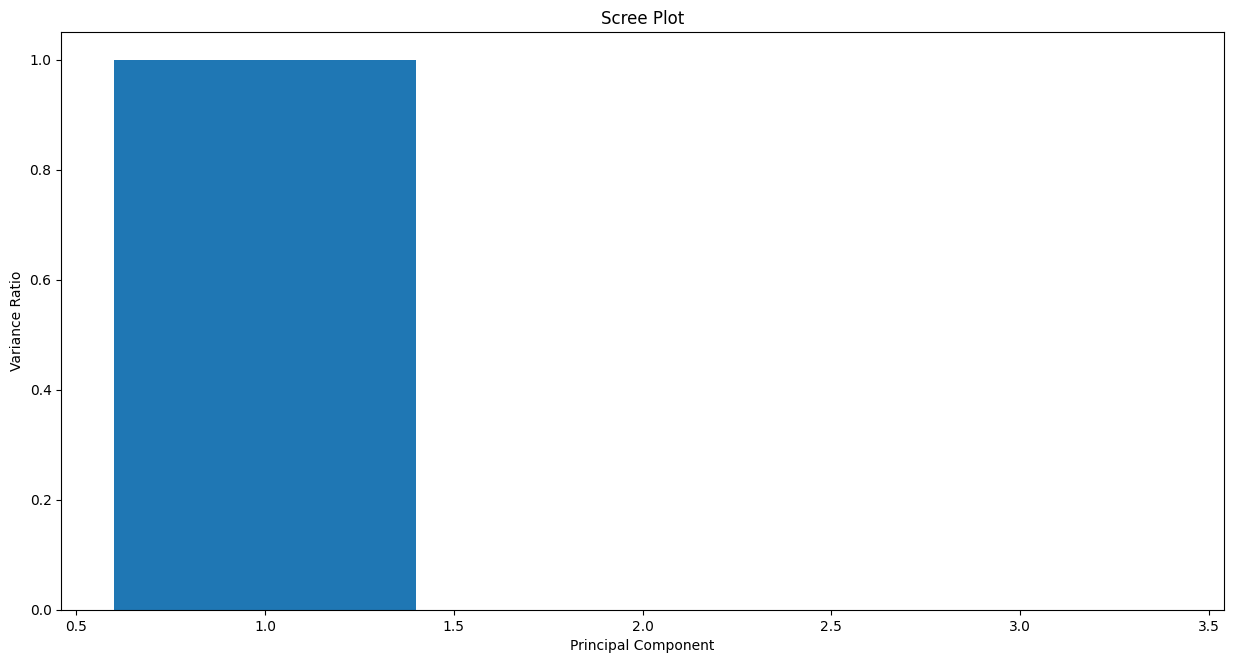

In [58]:
# plotting the Scree plot
plt.figure(figsize=(15, 7.5))
plt.bar(range(1, components+1), pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.show()

In [59]:
eigenvectors = pd.DataFrame(pca.components_, columns=input_features)

In [60]:
eigenvectors.loc[0].sort_values(ascending=False)

UMBRELLA_LIMIT         1.000000e+00
PROPERTY_DAMAGE_NO     1.526741e-08
FRAUD_Y                1.100990e-08
INCIDENT_STATE_NY      1.091223e-08
POLICE_REPORT_NO       9.049084e-09
                           ...     
INJURY_CLAIM          -1.376308e-08
PROPERTY_DAMAGE_YES   -1.526741e-08
VEHICLE_CLAIM         -1.545003e-08
CAPITAL_GAINS         -1.568425e-08
TOTAL_CLAIM_AMOUNT    -1.610944e-08
Name: 0, Length: 136, dtype: float64

### Dimensionality Reduction using `Linear Discriminant Analysis` (`LDA`)

Linear Discriminant Analysis is a linear, supervised machine learning algorithm. It attempts to find the most optimal `discriminant`; dimension with the most variation in features, in addition to maximizing the separation between the various target classes in the data.

Much like in Linear Regression (where we attempt to find a linear relationship or function between the input features and the target values), `discriminant` denotes the linear relationship between the input features and the target classes.



<ol>
    <li>The algorithm starts by computing the <code>mean vectors</code> for the data. Mean vectors are simply the mean values of various features within the data for each class.<br>For example, in the <code>insuarance_fraud</code> dataset, we have:<br>
        <table>
            <tr>
                <th>ACCOUNT_AGE</th>
                <th>CUSTOMER_AGE</th>
                <th>DEDUCTABLE</th>
                <th>ANNUAL_FEE</th>
                <th>FRAUD</th>
            </tr>
            <tr>
                <td>228</td>
                <td>42</td>
                <td>2000</td>
                <td>1197.22</td>
                <td>Y</td>
            </tr>
            <tr>
                <td>228</td>
                <td>44</td>
                <td>1000</td>
                <td>1583.91</td>
                <td>N</td>
            </tr>
            <tr>
                <td>121</td>
                <td>34</td>
                <td>1000</td>
                <td>936.61</td>
                <td>N</td>
            </tr>
            <tr>
                <td>257</td>
                <td>43</td>
                <td>2000</td>
                <td>1322.1</td>
                <td>N</td>
            </tr>
            <tr>
                <td>202</td>
                <td>34</td>
                <td>500</td>
                <td>848.07</td>
                <td>Y</td>
            </tr>
            <tr>
                <td>163</td>
                <td>37</td>
                <td>1000</td>
                <td>1200.33</td>
                <td>Y</td>
            </tr>
            <tr>
                <td>398</td>
                <td>55</td>
                <td>500</td>
                <td>862.19</td>
                <td>N</td>
            </tr>
            <tr>
                <td>17</td>
                <td>39</td>
                <td>1000</td>
                <td>840.95</td>
                <td>N</td>
            </tr>
            <tr>
                <td>141</td>
                <td>30</td>
                <td>1000</td>
                <td>1347.04</td>
                <td>N</td>
            </tr>
            <tr>
                <td>456</td>
                <td>60</td>
                <td>1000</td>
                <td>766.19</td>
                <td>N</td>
            </tr>
        </table>
        <table>
            <tr>
                <th>Class</th>
                <th>ACCOUNT_AGE</th>
                <th>CUSTOMER_AGE</th>
                <th>DEDUCTABLE</th>
                <th>ANNUAL_FEE</th>
            </tr>
            <tr>
                <td>$m_Y$</td>
                <td>197.66</td>
                <td>37.66</td>
                <td>1166.66</td>
                <td>1081.87</td>
            </tr>
            <tr>
                <td>$m_N$</td>
                <td>231.14</td>
                <td>43.57</td>
                <td>1071.42</td>
                <td>1092.12</td>
            </tr>
        </table>
        <p>Here, each row represents the <code>mean vector</code>.</p>
    </li>
    <li>After computing the mean vectors for the data, the algorithm computes the <code>within-class scatter matrix</code> ($S_W$) and <code>between-class scatter matrix</code> ($S_B$).<br>
        <ol>
            <li>$\text{within-class scatter matrix},\: S_W = \sum S_i$<br>$\text{Here,}\: S_i = \sum(x - m_i) ^ T(x - m_i)$<br>
                <p>Calculating $x - m_Y$ for the first class ($Y$)</p>
                <table>
                    <tr>
                        <th>ACCOUNT_AGE</th>
                        <th>CUSTOMER_AGE</th>
                        <th>DEDUCTABLE</th>
                        <th>ANNUAL_FEE</th>
                        <th>ACCOUNT_AGE $\bar{x}_Y$</th>
                        <th>CUSTOMER_AGE $\bar{x}_Y$</th>
                        <th>DEDUCTABLE $\bar{x}_Y$</th>
                        <th>ANNUAL_FEE $\bar{x}_Y$</th>
                        <th>$x-m_Y$</th>
                    </tr>
                    <tr>
                        <td>228</td>
                        <td>42</td>
                        <td>2000</td>
                        <td>1197.22</td>
                        <td>197.66</td>
                        <td>37.66</td>
                        <td>1166.66</td>
                        <td>1081.87</td>
                        <td>[30.34, 4.34, 833.33, 115.35]</td>
                    </tr>
                    <tr>
                        <td>228</td>
                        <td>44</td>
                        <td>1000</td>
                        <td>1583.91</td>
                        <td>197.66</td>
                        <td>37.66</td>
                        <td>1166.66</td>
                        <td>1081.87</td>
                        <td>[30.34, 6.34, -166.66, 502.04]</td>
                    </tr>
                    <tr>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                    </tr>
                    <tr>
                        <td>141</td>
                        <td>30</td>
                        <td>1000</td>
                        <td>1347.04</td>
                        <td>197.66</td>
                        <td>37.66</td>
                        <td>1166.66</td>
                        <td>1081.87</td>
                        <td>[-56.66, -7.66, -166.66, 265.17]</td>
                    </tr>
                    <tr>
                        <td>456</td> 
                        <td>60</td>
                        <td>1000</td>
                        <td>766.19</td>
                        <td>197.66</td>
                        <td>37.66</td>
                        <td>1166.66</td>
                        <td>1081.87</td>
                        <td>[258.34, 22.34, -166.66, -315.68]</td>
                    </tr>    
                </table>
                <p>Calculating $x - m_N$ for the next class ($N$)</p>
                <table>
                    <tr>
                        <th>ACCOUNT_AGE</th>
                        <th>CUSTOMER_AGE</th>
                        <th>DEDUCTABLE</th>
                        <th>ANNUAL_FEE</th>
                        <th>ACCOUNT_AGE $\bar{x}_N$</th>
                        <th>CUSTOMER_AGE $\bar{x}_N$</th>
                        <th>DEDUCTABLE $\bar{x}_N$</th>
                        <th>ANNUAL_FEE $\bar{x}_N$</th>
                        <th>$x-m_N$</th>
                    </tr>
                    <tr>
                        <td>228</td>
                        <td>42</td>
                        <td>2000</td>
                        <td>1197.22</td>
                        <td>231.14</td>
                        <td>43.57</td>
                        <td>1071.42</td>
                        <td>1092.12</td>
                        <td>[-3.14, -1.57, 928.58, 105.1]</td>
                    </tr>
                    <tr>
                        <td>228</td>
                        <td>44</td>
                        <td>1000</td>
                        <td>1583.91</td>
                        <td>231.14</td>
                        <td>43.57</td>
                        <td>1071.42</td>
                        <td>1092.12</td>
                        <td>[-3.140,  0.43, -71.42,  491.79]</td>
                    </tr>
                    <tr>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                    </tr>
                    <tr>
                        <td>141</td>
                        <td>30</td>
                        <td>1000</td>
                        <td>1347.04</td>
                        <td>231.14</td>
                        <td>43.57</td>
                        <td>1071.42</td>
                        <td>1092.12</td>
                        <td>[-90.14, -13.57, -71.42, 254.92]</td>
                    </tr>
                    <tr>
                        <td>456</td>
                        <td>60</td>
                        <td>1000</td>
                        <td>766.19</td>
                        <td>231.14</td>
                        <td>43.57</td>
                        <td>1071.42</td>
                        <td>1092.12</td>
                        <td>[224.86, 16.43, -71.42, 105.1]</td>
                    </tr>    
                </table>
                <p>Next, the algorithm computes the dot product of the transposed delta vector ($(x - m_i) ^ T$) with the original delta vector ($(x - m_i)$).<br>For the above data, that would look something like this:</p>
                <table>
                    <tr>
                        <th>$(x - m_i) ^ T$</th>
                        <th>$(x - m_i)$</th>
                        <th>$(x - m_i) ^ T(x - m_i)$</th>
                    </tr>
                    <tr>
                        <td>\begin{equation}
                \left[
                  \begin{array}{cccc}
                  30.34 \\
                  4.34 \\
                  833.33 \\
                  115.35
                  \end{array}
                \right]
                \end{equation}</td>
                        <td>$[30.34, 4.34, 833.33, 115.35]$</td>
                        <td>\begin{equation}
                \left[
                  \begin{array}{cccc}
                  920.52 & 131.68 & 25283.0 & 3499.7 \\
                  131.68 & 18.83 & 3616.7 & 500.62 \\
                  25283.0 & 3616.7 & 694440.0 & 96125.0 \\
                  3499.7 & 500.62 & 96125.0 & 13306.0
                  \end{array}
                \right]
                \end{equation}</td>
                    </tr>
                    <tr>
                        <td>...</td>
                        <td>...</td>
                        <td>...</td>
                    </tr>
                    <td>\begin{equation}
                \left[
                  \begin{array}{cccc}
                  258.34 \\
                  22.34 \\
                  -166.66 \\
                  -315.68
                  \end{array}
                \right]
                \end{equation}</td>
                    <td>$[258.34, 22.34, -166.66, -315.68]$</td>
                    <td>\begin{equation}
                \left[
                  \begin{array}{cccc}
                  66739.55 & 5771.31 & -43054.94 & -81552.77 \\
                  5771.31 & 499.07 & -3723.18 & -7052.29 \\
                  -43054.94 & -3723.18 & 27775.55 & 52611.22 \\
                  -81552.77 & -7052.29 & 52611.22 & 99653.86
                  \end{array}
                \right]
                \end{equation}</td>
                </table>
            </li>
            <li>$\text{between-class scatter matrix},\: S_B = \sum(m_i - m) ^ T(m_i - m)$<br>$\text{Here},\: m \implies \text{overall mean}$<p>For the above data:<br>$\text{Overall mean,}\: m= [221.1, 41.8, 1100, 1090.46]$</p>
                <table>
                    <tr>
                        <th>Class</th>
                        <th>Mean Vector</th>
                        <th>$(m_i - m)$</th>
                        <th>$(m_i - m) ^ T$</th>
                        <th>$(m_i - m) ^ T(m_i - m)$</th>
                    </tr>
                    <tr>
                        <td>$m_Y$</td>
                        <td>$[197.66, 37.66, 1166.66, 1081.87]$</td>
                        <td>$[-23.44, -4.14, 66.66, -8.59]$</td>
                        <td>\begin{equation}
                            \left[
                              \begin{array}{cccc}
                                  -23.44 \\
                                  -4.14 \\
                                  66.66 \\
                                  -8.59
                              \end{array}
                            \right]
                            \end{equation}</td>
                        <td>\begin{equation}
                            \left[
                              \begin{array}{cccc}
                              549.43 & 97.04 & -1562.51 & 201.34 \\
                              97.04 & 17.13 & -275.97 & 35.56 \\
                              -1562.51 & -275.97 & 4443.55 & -572.60 \\
                              201.34 & 35.56 & -572.60 & 73.78
                              \end{array}
                            \right]
                            \end{equation}</td>
                    </tr>
                    <tr>
                        <td>$m_N$</td>
                        <td>$[231.14, 43.57, 1071.42, 1092.12]$</td>
                        <td>$[10.04, 1.77, -28.58, 1.66]$</td>
                        <td>\begin{equation}
                            \left[
                              \begin{array}{cccc}
                              10.04 \\
                              1.77 \\
                              -28.58 \\
                              1.66
                              \end{array}
                            \right]
                            \end{equation}</td>
                        <td>\begin{equation}
                            \left[
                              \begin{array}{cccc}
                              100.80 & 17.77 & -286.94 & 16.66 \\
                              17.77 & 3.13 & -50.58 & 2.93 \\
                              -286.94 & -50.58 & 816.81 & -47.44 \\
                              16.66 & 2.93 & -47.44 & 2.75
                              \end{array}
                            \right]
                            \end{equation}</td>
                    </tr>
                </table>
                <p>Adding up the matrices in $(m_i - m) ^ T(m_i - m)$, we get<br>
                    $S_B = \begin{equation}
                    \left[
                      \begin{array}{cccc}
                      650.23 & 114.81 & -1849.45 & 218.01 \\
                      114.81 & 20.27 & -326.55 & 38.50 \\
                      -1849.45 & -326.55 & 5260.37 & -620.05 \\
                      218.01 & 38.50 & -620.05 & 76.54
                      \end{array}
                    \right]
                    \end{equation}$
                </p>
            </li>
        </ol>
    </li>
    <li>After having computed $S_W$ and $S_B$, the algorithm attempts to find the most optimal solution the <code>generalized eigenvalue problem</code>. Basically, the algorithm attempts to find a <code>scalar</code> value ($\lambda$) such that:<br>$S_{W}^{-1}S_Bv = \lambda v$</li>
    <li>Once the algorithm finds an optimal value, it computes $n$ eigenvector and eigenvalue pairs ($n$ is the number of features minus 1; for our example, number of features is $4 \implies 4 - 1 = 3\: \text{pairs}$).</li>
</ol>

### Implementing Linear Discriminant Analysis using scikit

In [61]:
# importing data
mbti_data = pd.read_csv(r'https://raw.githubusercontent.com/puneettrainer/datasets/main/mbti.csv')

In [62]:
# segregating target field and input features
target_field = 'Personality'
input_fields = list(mbti_data.columns)
input_fields.remove(target_field)
input_fields.remove('Response Id')

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# splitting training data and test data
training_data, test_data = train_test_split(mbti_data
                                          ,test_size = 0.25
                                          ,random_state = 500)

# training the LDA model for feature selection
lda = LinearDiscriminantAnalysis().fit(training_data[input_fields], training_data[target_field])

In [64]:
# applying LDA transformation for Decision Tree input
model_input_training = lda.transform(training_data[input_fields])
model_input_test =  lda.transform(test_data[input_fields])

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# instantiating and training Decision Tree on LDA transformed data
model = DecisionTreeClassifier().fit(model_input_training, training_data[target_field])
accuracy_score(test_data[target_field], model.predict(model_input_test))

0.7669333333333334

In [66]:
# instantiating and training Decision Tree on raw data
model = DecisionTreeClassifier().fit(training_data[input_fields], training_data[target_field])
accuracy_score(test_data[target_field], model.predict(test_data[input_fields]))

0.644

### k-Means Clustering

k-Means clustering is an unsupervised machine learning algorithm which is used to classify observations based on similarities between them.

In [97]:
hr_data = pd.read_csv(r'https://raw.githubusercontent.com/puneettrainer/datasets/main/hr_data.csv')
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22214 entries, 0 to 22213
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          22214 non-null  object 
 1   first_name  22214 non-null  object 
 2   last_name   22214 non-null  object 
 3   gender      22214 non-null  object 
 4   race        22214 non-null  object 
 5   department  22214 non-null  object 
 6   title       22214 non-null  object 
 7   location    22214 non-null  object 
 8   city        22214 non-null  object 
 9   state       22214 non-null  object 
 10  birth_date  22214 non-null  object 
 11  hire_date   22214 non-null  object 
 12  exit_date   3929 non-null   object 
 13  tenure      22214 non-null  float64
 14  age         22214 non-null  float64
dtypes: float64(2), object(13)
memory usage: 2.5+ MB


In [98]:
# formatting date columns as date data type
hr_data['birth_date'] = pd.to_datetime(hr_data['birth_date'])
hr_data['hire_date'] = pd.to_datetime(hr_data['hire_date'])
hr_data['exit_date'] = pd.to_datetime(hr_data['exit_date'])

In [99]:
# feature engineering date values
hr_data['birth_year'] = hr_data['birth_date'].dt.year
hr_data['hire_year'] = hr_data['hire_date'].dt.year
hr_data['exit_year'] = hr_data['exit_date'].dt.year

hr_data['birth_month'] = hr_data['birth_date'].dt.month
hr_data['hire_month'] = hr_data['hire_date'].dt.month
hr_data['exit_month'] = hr_data['exit_date'].dt.month

# updating exit_year and exit_month for employed employees
hr_data.loc[hr_data['exit_year'].isna(), 'exit_year'] = -1
hr_data.loc[hr_data['exit_month'].isna(), 'exit_month'] = -1

In [100]:
# segregating numeric and categorical fields
numeric_fields = list(hr_data.select_dtypes(include='number').columns)
categorical_fields = ['gender', 'race', 'title', 'location', 'state']

# encoding selected categorical fields
encoder = OneHotEncoder().fit(hr_data[categorical_fields])
hr_data.loc[:, encoder.get_feature_names_out()] = encoder.transform(hr_data[categorical_fields]).toarray()

# scaling numeric fields
scaler = RobustScaler().fit(hr_data[numeric_fields])
hr_data.loc[:, numeric_fields] = scaler.transform(hr_data[numeric_fields])

# updating list of input fields to include encoded categorical fields
input_fields = list(encoder.get_feature_names_out()) + numeric_fields

In [101]:
# instantiating and fitting a KMeans model
from sklearn.cluster import KMeans

model = KMeans().fit(hr_data[input_fields])

### Evaluation of Clusters

The aim of clustering data is to group similar observations into distinct clusters. After performing clustering, we need to evaluate the quality of the clusters created. This can be assessed by computing the :
- `inertia` of the clusters: this simply measures the sum of distances of various points within a cluster from the centroid. It should be as low as possible, since points within a cluster should be near the centroid of the cluster they are classified into.

$\text{Inertia} = \sum \text{distance}_{i}$<br>
$\text{distance}_{i} = \sum (x_j - \mu_c)$

- `Davies-Bouldin score`/`Dunn Index`: this measures the magnitude of separation between clusters. This should be as high as possible, since distinct clusters should be as far away from each other as possible.

$\text{Dunn Index} = \frac{min(distance_B)}{max(distance_W)}$<br>
$\text{Here},$<br>
$\text{distance}_B \implies \text{the distance between the centroids of clusters}$<br>
$\text{distance}_W \implies \text{the distance between the data points of a cluster to the centroid}$

`Dunn Index` $\in [0, \infty]$


- `Silhouette Score`: this measures the similarity of data points in a cluster to their cluster's centroid, as well as the centroid of other clusters. This should be as high as possible, which indicates that the data point is best suited to the cluster they are assigned to.
<ol>
    <li>first the mean distance between a data point ($x_i$) and other data points within the same cluster ($x_{SC}$) is calculated.</li>
    <li>then the mean distance between this data point ($x_i$) and other data points within the other clusters ($x_{OC}$) is calculated. Of all these, the distance of the nearest cluster is chosen.</li>
    <li>finally, the score is computed:<br>
        <br>
$\text{Silhouette Score} = \frac{min(mean(x_i - x_{OC})) - mean(x_i - x_{SC})}{max(min(mean(x_i - x_{OC})), mean(x_i - x_{SC}))}$</li>
    <ul>
        `Silhouette score` $\in [-1, 1]$
        <li>$-1 \implies$ the data point belongs to the other cluster</li>
        <li>$0 \implies$ the data point is at an overlap of clusters</li>
        <li>$1 \implies$ the data point is in the best cluster</li>
    </ul>
</ol>


In [102]:
model.inertia_

129246.21753262632

### Using `inertia` to figure out the optimal number of clusters

The value of `inertia` is plotted on an `elbow plot` to figure out the most optimal number of clusters for the data.

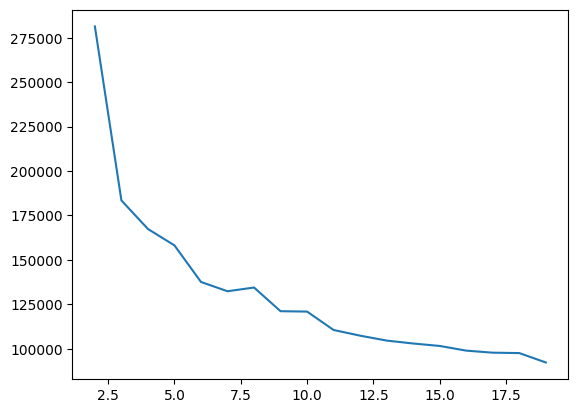

In [106]:
inertia = {}

for c in range(2, 20):
    model = KMeans(n_clusters=c).fit(hr_data[input_fields])
    inertia.update({c: model.inertia_})

plt.plot(inertia.keys(), inertia.values())
plt.show()

In [122]:
# from the above elbow plot, we can see that inertia starts stagnating at 12 clusters
model_12 = KMeans(n_clusters=12).fit(hr_data[input_fields])

In [123]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(hr_data[input_fields], model_12.predict(hr_data[input_fields]))

np.float64(1.6472615822500636)

In [124]:
from sklearn.metrics import silhouette_score

silhouette_score(hr_data[input_fields], model_12.predict(hr_data[input_fields]))

np.float64(0.11907092524727544)

### Using the results of clustering

After data has been clustered, we analyse the characteristics of each cluster to identify what differentiates one cluster from another. We compare the clusters to seek out similarities and differences, and use this data to resolve business requirements (such as figuring out which product needs to be promoted more in a particular region, etc.).